# Medidas de Posição e Tendência Central

Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
#https://matplotlib.org/stable/tutorials/intermediate/color_cycle.html


In [3]:
from scipy.stats.mstats import gmean,hmean
from scipy import stats

In [4]:
#https://docs.scipy.org/doc/scipy/reference/stats.html


**Média Aritmética (MA) - É a soma de todos os elementos do conjunto, divididos pelo número de elementos que compõe o conjunto.**


In [5]:
dados = [1,2,5,3,4]

In [6]:
np.mean(dados)

3.0

**Média Geométrica (MG) - É a raíz n-ésima do produto de todos os elementos que compõe o conjunto.**


In [7]:
gmean(dados)

2.6051710846973517

**Média Harmônica (MH) - É o número de elementos, divididos pela soma dos inversos dos elementos que compõem o conjunto.**



In [8]:
hmean(dados)

2.18978102189781

## Quando usar cada uma das médias?

### Funções para plotar gráficos

In [9]:
def plot_lines(dados, valor_central):
  if valor_central in dados:
    posicao_central = dados.index(valor_central)+1
  else:
    dados.append(valor_central)
    dados.sort()
    posicao_central = dados.index(valor_central)+1
  
  posicoes = np.arange(1,len(dados)+1,1)
  plt.figure(figsize=(8,6))
  plt.plot(posicoes,dados,'o-', color='red',ms=15)
  plt.plot(posicao_central, valor_central, 'o-',color='blue',ms=15)
  plt.show()

In [10]:
def plot_line_means(dados, mean, gmean,hmean):
  posicoes_centrais=[]
  y=[]
  x = dados
  
  for m in [mean,gmean,hmean]:
    x.append(m)
  
  x.sort()
  for m in [mean,gmean,hmean]:
    if m in x:
      posicoes_centrais.append(x.index(m)+1)
  
  print("Dados: {}".format(x))
  print("Media aritmética: {}, Média Geométrica: {}, Média Harmonica: {}".format(mean,gmean,hmean))
  
  y = np.arange(1,len(x)+1,1)
  
  plt.figure(figsize=(8,6))
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b'])))
  plt.plot(y,x,'o-', color='black',ms=15)
  medias = ['MA','MG','MH'] 
  i=0
  for posicao_central,valor_central in zip(posicoes_centrais,[mean,gmean,hmean]):
    plt.plot(posicao_central, valor_central, 'o-',ms=15)
    plt.text(x=posicao_central+0.2, y=valor_central+0.2, s=medias[i], alpha=0.7, color='#334f8d')
    i+=1

  plt.show()

In [11]:
def plot_lines_horizontal(dados,valor_central):
  plt.figure(figsize=(10,6))
  y = 0
  plt.hlines(y, min(dados), max(dados))
  for n in dados:
    if n == valor_central:
      plt.plot(n,y, 'o', ms = 15, color='blue')
      continue  
    plt.plot(n,y, 'o', ms = 15, color = 'red')

### Considere os cenários

Exemplo de dados gerados a partir de uma **operação de adição**, a soma do valor 3 em cada elemento do vetor (relacionamento linear)

In [12]:
dados_linear = [1, 4, 7, 10, 13, 16, 19]

Calculando a média aritmética

In [13]:
media = int(np.mean(dados_linear))

In [14]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 10


Plotando os dados e seu valor central

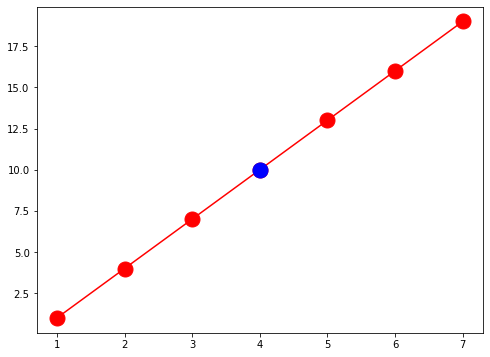

In [15]:
plot_lines(dados_linear,media)

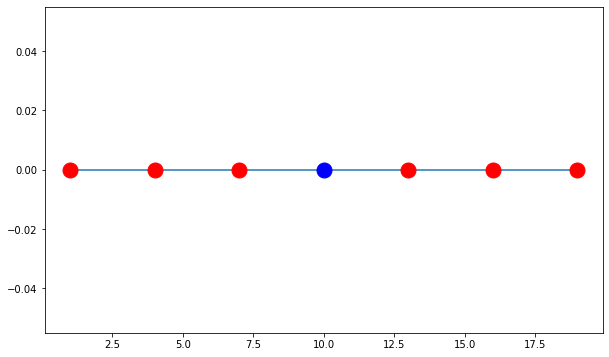

In [16]:
plot_lines_horizontal(dados_linear,media)

Exemplo de dados gerados a partir de uma **operação de multiplicação**, a multiplicação de cada elemento pelo valor de 3 (relacionamento exponencial)

In [17]:
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

Calculando a média aritmética.

(1 + 3 + 9 + 27 + 81 + 243 + 729) ÷ 7 = **156.1**

In [18]:
media = int(np.mean(dados_exponencial))

In [19]:
print("Valor da média aritmética dos dados: {}".format(media))

Valor da média aritmética dos dados: 156


Plotando os dados e seu valor central.

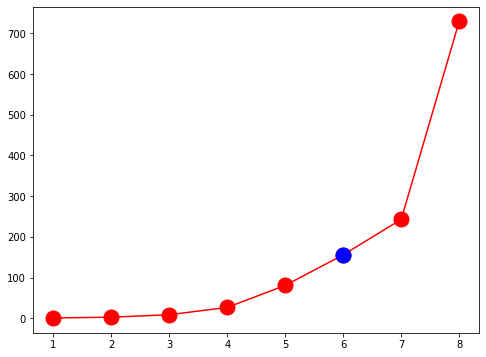

In [20]:
plot_lines(dados_exponencial,media)

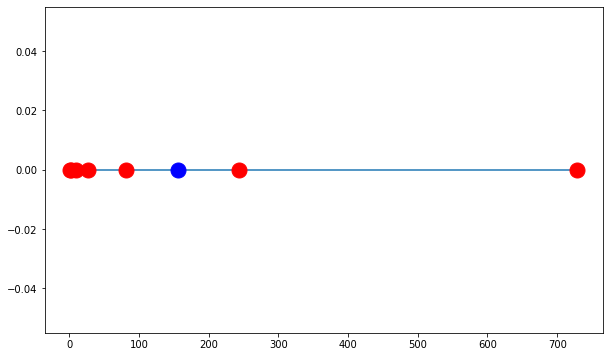

In [21]:
plot_lines_horizontal(dados_exponencial,media)

Considerando agora a aplicação da média geométrica.

Especificando os mesmos dados com um relacionando exponencial.

In [22]:
dados_exponencial = [1, 3, 9, 27, 81, 243, 729]

Calculando a média geométrica.

(1 * 3 * 9 * 27 * 81 * 243 * 729) = 10,460,353,203

Raiz sétima (7) de **10,460,353,203** = 27

In [23]:
media_geo = int(gmean(dados_exponencial))

In [24]:
print("Valor da média geométrica dos dados: {}".format(media_geo))

Valor da média geométrica dos dados: 27


Plotando os dados e seu valor central.

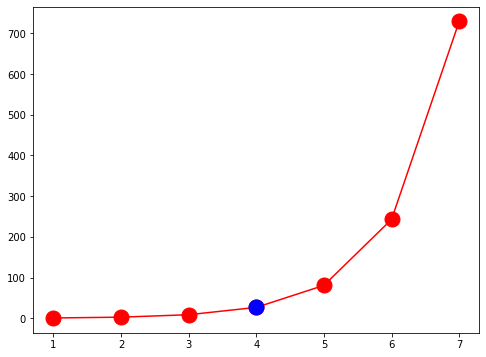

In [25]:
plot_lines(dados_exponencial,media_geo)

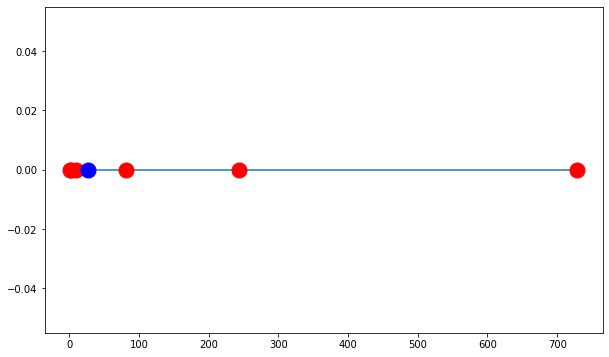

In [26]:
plot_lines_horizontal(dados_exponencial,media_geo)

### Considerações importantes

*   A **média aritmética** produz um resultado interessante quando temos um **relacionamento aditivo** entre os números da amostra.
*   Este relacionamento é chamado linear pois, ao exibir graficamente os valores tendem a seguir uma linha ascendente ou descendente.
*   Já a **média geométrica** é mais apropriada quando temos uma amostra com um **relacionamento multiplicativo** ou exponencial.


*   A diferença entre as médias é que enquanto a média aritmética faz a **soma** de todos os elementos e depois a **divisão**, a média geométrica atua com a **multiplicação** entre os elementos e depois reescala através da **raiz** os valores para a mesma unidade da amostra.








# Comparando as médidas em um cenário real.
### Verificando os valores de avaliações de dois cafés.
### Hard Rock Café Gramado vs Hard Rock Café Curitiba.

**Hard Rock Café Gramado**
*   Avaliações no TripAdvisor: 3,5
*   Índice de Satisfação dos Clientes: 89%

**Hard Rock Café Curitiba**
*   Avaliaçõs no TripAdvisor: 4,5
*   Índice de Satisfação dos Clientes: 75%


Aplicação de verificar o estabelecimento com a **melhor avaliação em diferentes escalas**.

Calculando a média aritmética

In [27]:
aval_gramado,aval_curitiba = 3.5, 4.5
indice_gramado,indice_curitiba = 89, 75

In [28]:
print("Média para Gramado: {}".format(np.mean([aval_gramado,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba,indice_curitiba])))

Média para Gramado: 46.25
Média para Curitiba: 39.75


Considerando a média aritmética o Hard Rock Café de Gramado é o estabelecimento melhor avaliado.

Agora vamos considerar a possibilidade de **fazer uma reescala dos dados** de avaliação do trip advisor.

In [29]:
print("Valores reescalados: {},{}".format(aval_gramado*20,aval_curitiba*20))

Valores reescalados: 70.0,90.0


Calculando a média aritmética

In [30]:
print("Média para Gramado: {}".format(np.mean([aval_gramado*20,indice_gramado])))
print("Média para Curitiba: {}".format(np.mean([aval_curitiba*20,indice_curitiba])))

Média para Gramado: 79.5
Média para Curitiba: 82.5


Considerando o mesmo cenário agora utilizando a média geométrica.

In [31]:
print("Média Geométrica para Gramado: {}".format(gmean([aval_gramado,indice_gramado])))
print("Média Geométrica para Curitiba: {}".format(gmean([aval_curitiba,indice_curitiba])))

Média Geométrica para Gramado: 17.64936259472279
Média Geométrica para Curitiba: 18.371173070873837


### Considerações
*   Os valores alterados para a mesma escala nos deram **resultados diferentes** mais próximos da realidade.
*   Utilizando a média geométrica já nos entrega o resultado "correto" pois considera o **relacionamento multiplicativo** entre os dados da amostra.
*   É importante notar que aplicando a média geométrica para os dados em **diferentes escalas** o retorno não está na mesma unidade da amostra.




## Média harmônica.

Percurso Total da Viagem 10km
*   CAMINHO DE IDA = 30km/h
*   CAMINHO DE VOLTA = 10km/h

**Qual a velocidade média da viagem?**

Usando a média aritmética

In [32]:
np.mean([30,10])

20.0

**VIAGEM DE IDA - 5km à 30km/h**
*   30 km por 60 minutos = 1 km a cada 2 minutos = 1/2 km por minuto.
*   5km a 1/2 km por minuto = 10 minutos.


**VIAGEM DE VOLTA - 5km à 10km/h**
*   10 km por 60 minutos = 1 km a cada 6 minutos = 1/6 km por minuto.
*   5 km a 1/6 km por minuto = 30 minutos.

Tempo total da viagem = 40 minutos

Proporção da viagem de ida em relação ao tempo total da viagem.

In [33]:
print("Proporção de tempo da viagem de ida em relação ao tempo total da viagem: {}%".format((10/40)*100))

Proporção de tempo da viagem de ida em relação ao tempo total da viagem: 25.0%


In [34]:
print("Proporção de tempo da viagem de volta em relação ao tempo total da viagem: {}%".format((30/40)*100))

Proporção de tempo da viagem de volta em relação ao tempo total da viagem: 75.0%


**Calculando a Média Aritmética Ponderada.**

In [35]:
np.average([30,10], weights=[.25,.75])

15.0

In [36]:
hmean([30,10])

15.0

### As médias seguem um relacionamento ordinal: **média harmônica < média geométrica < a média aritmética**.

Considerando os dados com o relacionamento aditivo.

In [37]:
dados = [1, 4, 7, 10, 13, 16, 19]

In [38]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [39]:
media_aritmetica,media_geometrica,media_harmonica

(10.0, 7.3, 4.15)

Visualizando graficamente.

Dados: [1, 4, 4.15, 7, 7.3, 10, 10.0, 13, 16, 19]
Media aritmética: 10.0, Média Geométrica: 7.3, Média Harmonica: 4.15


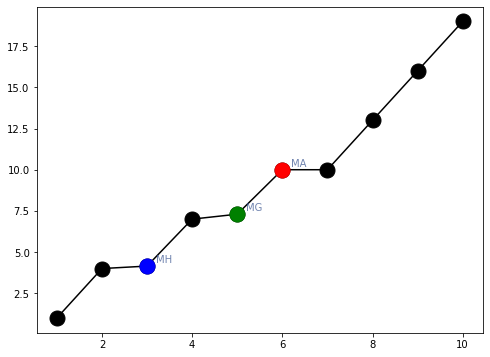

In [40]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)

Considerando os dados com o relacionamento multiplicativo.

In [41]:
dados = [1, 3, 9, 27, 81, 243, 729]

In [42]:
media_aritmetica,media_geometrica,media_harmonica = round(np.mean(dados),2),round(gmean(dados),2),round(hmean(dados),2)

In [43]:
media_aritmetica,media_geometrica,media_harmonica

(156.14, 27.0, 4.67)

Visualizando graficamente.

Dados: [1, 3, 4.67, 9, 27, 27.0, 81, 156.14, 243, 729]
Media aritmética: 156.14, Média Geométrica: 27.0, Média Harmonica: 4.67


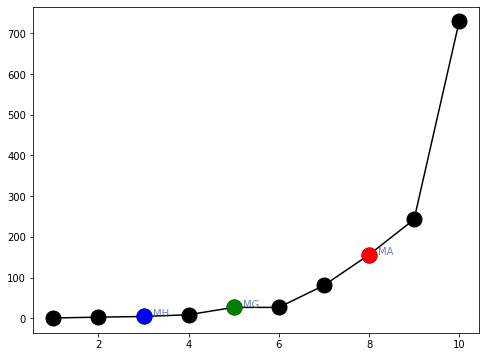

In [44]:
plot_line_means(dados,media_aritmetica,media_geometrica,media_harmonica)


**Moda - Valores mais frequentes da distribuição**

In [45]:
dados=[4,5,4,6,5,8,4]

In [46]:
stats.mode(dados) #quantas vezes aparece

ModeResult(mode=array([4]), count=array([3]))

In [47]:
dados_bimodal=[4,5,4,6,5,8,4,4,5,5]

In [48]:
from collections import Counter

In [49]:
def calcula_moda(dados):
  number_counts = Counter(dados)
  print(number_counts)
  modes = [val for val,count in number_counts.items() if count == max(number_counts.values())]
  return modes

In [50]:
calcula_moda(dados_bimodal) #retorna quantos números se repetem

Counter({4: 4, 5: 4, 6: 1, 8: 1})


[4, 5]

In [51]:
dados_amodal=[1,2,3,4,5]

In [52]:
calcula_moda(dados_amodal)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})


[1, 2, 3, 4, 5]

**Mediana - É o valor da variável que divide os dados ordenados em duas partes de igual frequência.**

In [53]:
dados_mediana7 = [7,1,5,2,3,1,6] #ímpar
np.array(dados_mediana7).size

7

In [54]:
np.sort(dados_mediana7) #ordenar

array([1, 1, 2, 3, 5, 6, 7])

In [55]:
#nº de elementos pares = 7
#[(7 + 1)/2
#(4º termo da série ordenada será a mediana)
#Md = 3

In [56]:
np.median(dados_mediana7) #mediana

3.0

In [57]:
dados_mediana8 = [1,2,1,1,4,5,3,6] #par

In [58]:
np.array(dados_mediana8).size

8

In [59]:
np.sort(dados_mediana8) #ordenar

array([1, 1, 1, 2, 3, 4, 5, 6])

In [60]:
#nº de elementos pares = 8
#[(10/2)+ (10/2)+1]/2
#(5ºtermo + 6ºtermo) / 2
#(2 + 3)/2
#Md = 2.5

In [61]:
np.median(dados_mediana8) #mediana

2.5

# Medidas Separatrizes

In [62]:
notas = [13,30,69,72,33,41,28,17,65]

In [63]:
np.sort(notas) #ordenar não esquecer

array([13, 17, 28, 30, 33, 41, 65, 69, 72])

In [64]:
#atualização do numpy 1.19.0 
#Precisamos, portanto, de três quartis(Q1,Q2,Q3) para dividir a séris em quatro partes iguais.


**Q1 - Primeiro Quartil**

In [65]:
#número de elementos = 9
# (13, 17, 28, 30, 33)
# Q1 = (5 + 1)/2  = 3º elemento => 28
# Q2 = 33
# (33, 41, 65, 69, 72)
#Q3 = ( 5 + 1)/2 = 65

In [66]:
np.quantile(notas,.25)

28.0

**Q2 - Segundo Quartil**

In [67]:
#lembrando que o quartil Q2 sempre será igual a mediana da série.

In [68]:
np.quantile(notas,.50)

33.0

Comparando com o valor da Mediana

In [69]:
np.median(notas)

33.0

**Q3 - Terceiro Quartil**

In [70]:
np.quantile(notas,.75)

65.0

**P25 - Percentil 25 = Q1**

In [71]:
np.percentile(notas,25)

28.0

**P50 - Percentil 50 = Q2**


In [72]:
np.percentile(notas,50)

33.0

**P75 - Percentil 75 = Q3**

In [73]:
np.percentile(notas,75)

65.0

## Medidas de Variação e Dispersão

In [74]:
# As medidas de dispersão são capazes de descrever o quanto os valores de um conjuto estão próximos
# ou distantes de uma medida central com a média
# As medidas mais comuns de dispersão ou variância de dados são:
# amplitude, variância, desvio padrão e coeficiênte de variação.

In [75]:
dados_dispersao = [10,20,30,40,50,60,70,80,90,100]

In [76]:
# amplitude - é a diferença entre o maior e menor valor de um conjunto(v), 
# embora seja uma medida simples de calcular sua interpretação precisa ser feita com cuidado, pois ela pode ser influenciada por
# valores extremos(outileirs).
# amplitude = max(dados_dispersao) - min(dados_dispersao) # 100 - 10 = 90

amplitude = np.ptp(np.array(dados_dispersao))
print (amplitude)

90


**Média**

In [77]:
np.mean(dados_dispersao)

55.0

**Variância**


In [78]:
np.var(dados_dispersao)
#os estatísticos dividem por n-1 em vez de n na fórmula para s, para que os resultados tenham propriedades melhores.
#(1º elemento - média)² => (10 - 55)² => (-45)²
#...
#(10º elemento  - média)²=>(100 -55)² => (45)²
# 8250 / 10 => 825 (some todos os elementos e divida pela quantidade de elementos)

825.0

**Desvio Padrão**


In [79]:
np.std(dados_dispersao)
# faça a raiz quadarada da variância.

28.722813232690143

**Coeficiente de Variação**

In [80]:
stats.variation(dados_dispersao)
# é a razão entre o desvio padrão e a média.
# 28.72 / 55
# também conhecido como coeficiente de variação de Perarson.
# é capaz de expressar a dispersão relativa dos valores e é útil para comparar a dispersão de dois ou mais conjuntos de valores.

0.5222329678670935

Importante: Um coeficiente de variação **menor que 25%** é um bom indicativo de homogeneidade dos dados, ou seja, os dados não variam tanto a partir da média.

In [81]:
media=np.mean(dados_dispersao)
desvio_padrao = np.std(dados_dispersao)

In [82]:
desvio_padrao/media

0.5222329678670935

# Exemplo usando o Pandas

Importando as bibliotecas.

In [1]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carregando a base de dados.

In [2]:
df = pd.read_csv("cars.csv")

Verificando os dados.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null object
Invoice        428 non-null object
EngineSize     428 non-null float64
Cylinders      426 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null int64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 50.2+ KB


Verificando as informações do conjunto de dados.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null object
Invoice        428 non-null object
EngineSize     428 non-null float64
Cylinders      426 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null int64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 50.2+ KB


In [5]:
df.loc[df.Cylinders.isnull()].head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238,18,24,3029,106,174


In [6]:
df.loc[df.Cylinders.isnull(),"Cylinders"] = 0

Limpando os dados do atributo MSRP.

In [7]:
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]

Verificando os dados após limpeza.

In [8]:
df['MSRP'].head(5)

0    36945
1    23820
2    26990
3    33195
4    43755
Name: MSRP, dtype: object

Verificando as informações do conjunto de dados.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null object
Invoice        428 non-null object
EngineSize     428 non-null float64
Cylinders      428 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null int64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 50.2+ KB


Transformando os dados para o formato numérico.

In [10]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
Make           428 non-null object
Model          428 non-null object
Type           428 non-null object
Origin         428 non-null object
DriveTrain     428 non-null object
MSRP           428 non-null int64
Invoice        428 non-null object
EngineSize     428 non-null float64
Cylinders      428 non-null float64
Horsepower     428 non-null int64
MPG_City       428 non-null int64
MPG_Highway    428 non-null int64
Weight         428 non-null int64
Wheelbase      428 non-null int64
Length         428 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 50.2+ KB


In [12]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.780374,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.604557,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,0.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


Calculando a média aritmética.

In [13]:
df["MSRP"].mean()

32774.85514018692

In [14]:
msrp = df["MSRP"]

In [15]:
msrp.mean()

32774.85514018692

Média geométrica

In [16]:
gmean(msrp)

NameError: name 'gmean' is not defined

Média Harmônica

In [ ]:
hmean(msrp)

Mediana

In [ ]:
msrp.median()

Moda

In [ ]:
msrp.mode()

Variação

In [ ]:
msrp.var()

Desvio padrão

In [ ]:
msrp.std()

Valor máximo.

In [ ]:
msrp.max()

Valor mínimo

In [ ]:
msrp.min()

# Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [17]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew, stats
%matplotlib inline

Função para calcular estatísticas.

In [18]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

Considere a seguinte amostra.

In [19]:
s0 = [4,5,6,5,5,6,6,5,4,5,5,5]

In [20]:
calcula_estatisticas(s0)

Media: 5.08
Moda: 5.0
Mediana: 5
Variância: 0.41
Desvio Padrão: 0.64
Coeficiente Person: -0.08
Coeficiente de Kurtosi: -0.58


Distribuição Simétrica - Média = Moda = Mediana.

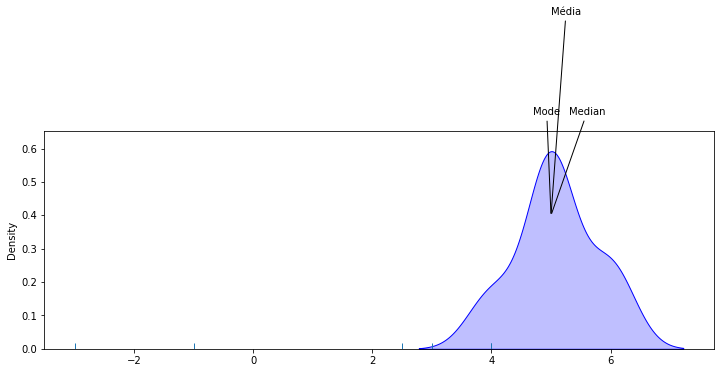

In [74]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.kdeplot(s0, color="blue", fill=True, ax=ax)

sns.rugplot(s2, ax=ax)

ax.annotate('Mode', xy=(5, 0.4), xytext=(4.7, 0.7),arrowprops={'arrowstyle': '-'})         
ax.annotate('Median', xy=(5, 0.4), xytext=(5.3, 0.7),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(5, 0.4), xytext=(5.0, 1), arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

Considere a segunda amostra.

In [22]:
s1 = [12,8.0, 4, 3, 2,1,1]

In [23]:
calcula_estatisticas(s1)

Media: 4.43
Moda: 3.0
Mediana: 1.0
Variância: 14.53
Desvio Padrão: 3.81
Coeficiente Person: 0.98
Coeficiente de Kurtosi: -0.45


Asimétrica Positiva / à direita - Média > Moda > Mediana

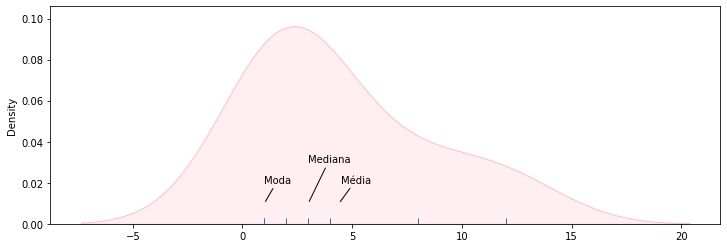

In [72]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(s1,color="pink",fill=True, ax=ax)

sns.rugplot(s1, ax=ax)

ax.annotate('Moda', xy=(1,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(3, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(4.4, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de 1 a distribuição é assimétrica positiva

Considere a terceira amostra

In [25]:
s2 = [-3,-1,4,2.5,4,3]

In [26]:
calcula_estatisticas(s2)

Media: 1.58
Moda: 2.75
Mediana: 4.0
Variância: 7.03
Desvio Padrão: 2.65
Coeficiente Person: -0.73
Coeficiente de Kurtosi: -1.12


Assimétrica negativa / à esquerda - Média < Moda < Mediana

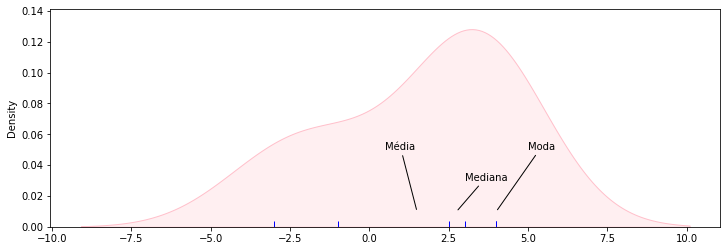

In [65]:
fig, ax = plt.subplots(figsize=(12, 4))
#ax = sns.distplot(s2,rug=True,kde=True,height=4, aspect=2)
# KDE Plot
sns.kdeplot(s2, color='pink', fill=True, ax=ax)

# Rug Plot
sns.rugplot(s2, color='blue', ax=ax)

ax.annotate('Moda', xy=(4,0.01), xytext=(5, 0.05),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(2.75, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(1.5, 0.01), xytext=(0.5, 0.05),arrowprops={'arrowstyle': '-'})
plt.show()

Coeficiente de Pearson - O valor é próximo de -1 a distribuição é assimétrica negativa.

### Gerando dados aleatórios

Amostra seguindo uma distribuição normal

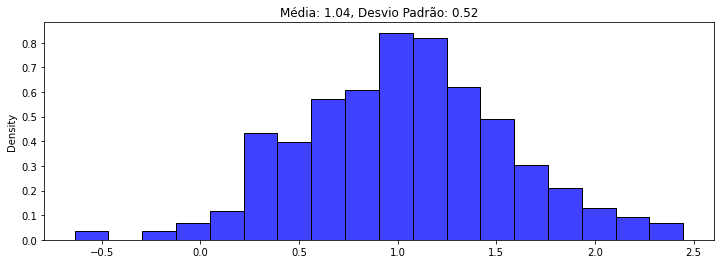

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calcula_estatisticas(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

sample_normal = np.random.normal(1, 0.5, 500)
mean, std_dev = calcula_estatisticas(sample_normal)

fig = plt.figure(figsize=(12, 4))
sns.histplot(sample_normal, kde=False, stat='density', color='blue')  
plt.title(f'Média: {mean:.2f}, Desvio Padrão: {std_dev:.2f}')
plt.show()


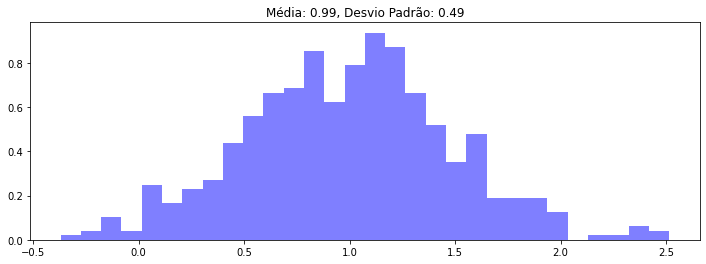

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def calcula_estatisticas(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

sample_normal = np.random.normal(1, 0.5, 500)
mean, std_dev = calcula_estatisticas(sample_normal)

fig = plt.figure(figsize=(12, 4))
plt.hist(sample_normal, bins=30, density=True, alpha=0.5, color='b')  
plt.title(f'Média: {mean:.2f}, Desvio Padrão: {std_dev:.2f}')
plt.show()


In [30]:
sample_normal = np.random.normal(1,0.5,500)
#amostra com distribuição normal de média = 1 e desvio padrão 0.5 e 500 amostras

In [31]:
sample_normal[:10]

array([0.84801324, 1.53669099, 0.93964319, 0.51650095, 0.7867535 ,
       1.00314241, 0.8925122 , 1.38653046, 0.42584733, 0.78639314])

In [32]:
calcula_estatisticas(sample_normal)

(0.984148217777575, 0.49872090958088866)

Visualizando a distribuição

<AxesSubplot:ylabel='Count'>

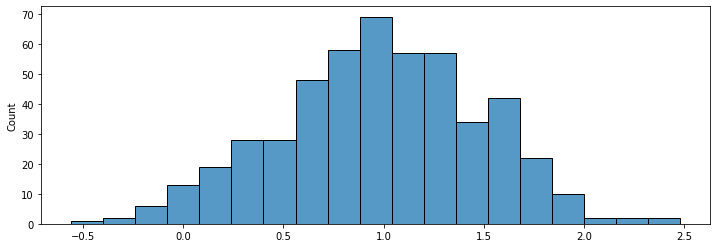

In [53]:
fig = plt.figure(figsize=(12, 4))
sns.histplot(sample_normal)

In [34]:
# quando a média for igual a moda(AS = 0), 
# a distribuição será simétrica, terá ausência de assimetria.

Distribuição simétrica, com o coeficiente de pearson próximo a zero.

Considere o seguinte exemplo

In [35]:
exp = np.arange(2,len(sample_normal),2)

Verificando os expoentes

In [36]:
exp[:10]

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

Gerando uma distribuição assimétrica positiva

In [37]:
sample_assimetrica_positiva = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_positiva.append(s*e)

In [38]:
calcula_estatisticas(sample_assimetrica_positiva)

(242.53910843995385, 201.9287034243061)

Visualizando a distribuição

<AxesSubplot:ylabel='Count'>

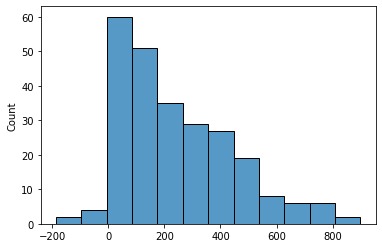

In [51]:
sns.histplot(sample_assimetrica_positiva)

In [40]:
# quando a média for maior que a moda (AS > 0) 
# a distribuição será assimétria à direita ou positiva

Gerando uma distribuição assimétrica negativa.

In [41]:
exp = (np.arange(2,len(sample_normal),2))*-1

Verificando os expoêntes

In [42]:
exp[:10]

array([ -2,  -4,  -6,  -8, -10, -12, -14, -16, -18, -20])

In [43]:
sample_assimetrica_negativa = []
for s,e in zip(sample_normal,exp):
    sample_assimetrica_negativa.append(s*e)

In [44]:
calcula_estatisticas(sample_assimetrica_negativa)

(-242.53910843995385, 201.9287034243061)

Visualizando a distribuição

<AxesSubplot:ylabel='Count'>

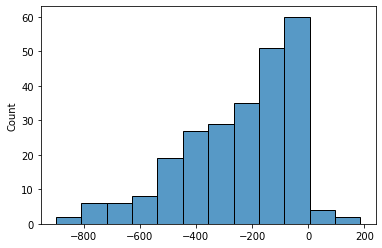

In [50]:
sns.histplot(sample_assimetrica_negativa)

In [46]:
# quando a média for menor que a moda (AS < 0),
# a distribuição será assimétrica a esquerda ou negativa

Verificando graficamente as distribuições dos atributos do Dataframe

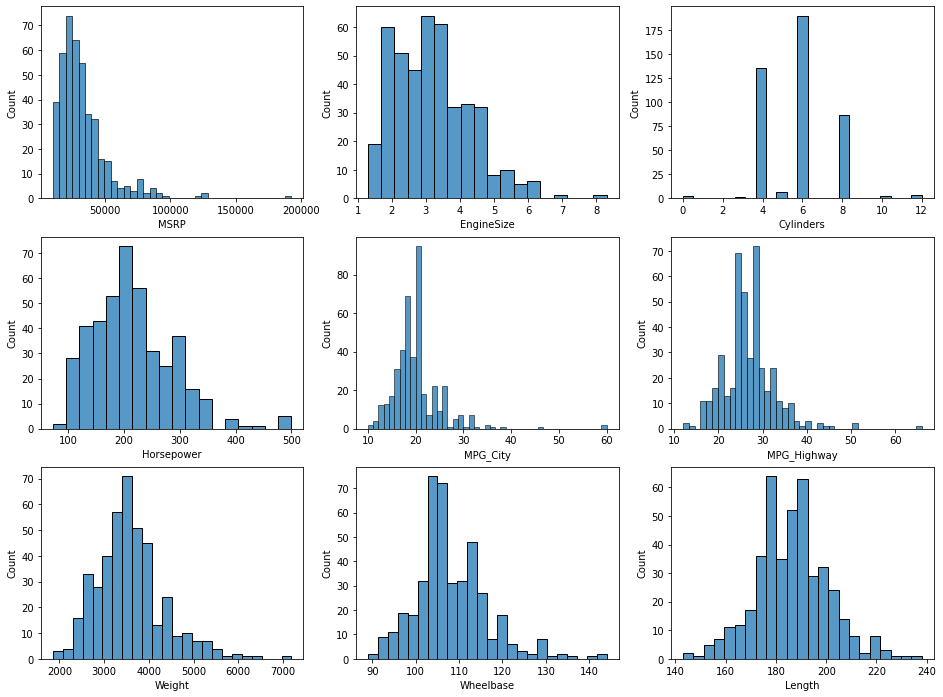

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(16, 12))
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    sns.histplot(df[column],ax=axes[i//3,i%3])

Verificando a distribuição de probabilidade e a diferença entre a média e a mediana.

In [48]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Media: {}, Mediana: {}".format(column,cvar,media,median))

Atributo: MSRP, Coeficiente de Variação: 59.29 %, Media: 32774.86, Mediana: 27635.0
Atributo: EngineSize, Coeficiente de Variação: 34.64 %, Media: 3.2, Mediana: 3.0
Atributo: Cylinders, Coeficiente de Variação: 27.76 %, Media: 5.78, Mediana: 6.0
Atributo: Horsepower, Coeficiente de Variação: 33.27 %, Media: 215.89, Mediana: 210.0
Atributo: MPG_City, Coeficiente de Variação: 26.11 %, Media: 20.06, Mediana: 19.0
Atributo: MPG_Highway, Coeficiente de Variação: 21.39 %, Media: 26.84, Mediana: 26.0
Atributo: Weight, Coeficiente de Variação: 21.21 %, Media: 3577.95, Mediana: 3474.5
Atributo: Wheelbase, Coeficiente de Variação: 7.69 %, Media: 108.15, Mediana: 107.0
Atributo: Length, Coeficiente de Variação: 7.7 %, Media: 186.36, Mediana: 187.0
